In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
X=[]
Z=[]
IMG_SIZE=224
Nam='Data/5/'
Sau='Data/6/'
Bay='Data/7/'
Tam='Data/8/'
Chin='Data/9/'

In [ ]:
def nhan(img,kieuso):
    return kieuso 

In [ ]:
def make_train_data(kieuso,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = nhan(img,kieuso )
        path = os.path.join(DIR,img)
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))     

In [ ]:
make_train_data('5',Nam)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████| 1157/1157 [01:11<00:00, 16.17it/s]

1157


In [ ]:
make_train_data('6',Sau)
print(len(X))


100%|██████████████████████████████████████████████████████████████████████████████| 1237/1237 [03:04<00:00,  6.71it/s]

2394


In [ ]:
make_train_data('7',Bay)
print(len(X))


100%|████████████████████████████████████████████████████████████████████████████████| 887/887 [01:20<00:00, 11.00it/s]

3281


In [ ]:
make_train_data('8',Tam)
print(len(X))


100%|████████████████████████████████████████████████████████████████████████████████| 705/705 [01:04<00:00, 10.86it/s]

3986


In [ ]:
make_train_data('9',Chin)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 971/971 [01:31<00:00, 10.56it/s]

4957


In [ ]:
le=LabelEncoder()

Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(3469, 224, 224, 3)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,  # xoay 
        zoom_range = 0.1, # Thu phóng 
        width_shift_range=0.2,  # thay đổi ngẫu nhiên hình ảnh theo chiều ngang (một phần nhỏ của tổng chiều rộng)
        height_shift_range=0.2,  # thay đổi ngẫu nhiên hình ảnh theo chiều dọc (một phần nhỏ của tổng chiều cao)
        horizontal_flip=True) #Lật
datagen.fit(x_train)
x_train.shape

(3469, 224, 224, 3)

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import SGD,Adam
from keras.utils.vis_utils import model_to_dot

import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_classes = 5

In [ ]:
# input
input_image = Input(shape=(224,224,3), name='Input')

# matrix ---> vector
x = Flatten(name='flatten')(input_image)

# FC layers + dropout
x = Dense(units=1024, activation='relu', name='fc1')(x)

x = Dense(units=512, activation='relu', name='fc2')(x)

x = Dense(units=512, activation='relu', name='fc3')(x)

x = Dense(units=128, activation='relu', name='fc4')(x)

output_label = Dense(units=num_classes, activation='softmax', name='fc3_softmax')(x)

# define model
model = Model(inputs=input_image, outputs=output_label, name='mlp')

# print model summary
model.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 fc1 (Dense)                 (None, 1024)              154141696 
                                                                 
 fc2 (Dense)                 (None, 512)               524800    
                                                                 
 fc3 (Dense)                 (None, 512)               262656    
                                                                 
 fc4 (Dense)                 (None, 128)               65664     
                                                                 
 fc3_softmax (Dense)         (None, 5)                 645     

In [ ]:
# declare learning rate, loss function, and model metric
loss = 'categorical_crossentropy'
lr = 0.01
model.compile(loss=loss, optimizer=SGD(lr=lr), metrics=['accuracy'])

# train the model
batch_size = 64
epochs = 50

starting_time = time.time()
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Epoch 1/50
54/54 [==============================] - 90s 2s/step - loss: 1.8662 - accuracy: 0.2443 - val_loss: 1.5001 - val_accuracy: 0.3320
Epoch 2/50
54/54 [==============================] - 83s 2s/step - loss: 1.5389 - accuracy: 0.2878 - val_loss: 1.4771 - val_accuracy: 0.3132
Epoch 3/50
54/54 [==============================] - 86s 2s/step - loss: 1.4938 - accuracy: 0.3198 - val_loss: 1.4225 - val_accuracy: 0.2897
Epoch 4/50
54/54 [==============================] - 89s 2s/step - loss: 1.4700 - accuracy: 0.3468 - val_loss: 1.3953 - val_accuracy: 0.4241
Epoch 5/50
54/54 [==============================] - 89s 2s/step - loss: 1.4567 - accuracy: 0.3554 - val_loss: 1.4478 - val_accuracy: 0.3548
Epoch 6/50
54/54 [==============================] - 79s 1s/step - loss: 1.4158 - accuracy: 0.3806 - val_loss: 1.3083 - val_accuracy: 0.4523
Epoch 7/50
54/54 [==============================] - 76s 1s/step - loss: 1.3779 - accuracy: 0.3984 - val_loss: 1.2843 - val_accuracy: 0.4456
Epoch 8/50
54/54 [==

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

47/47 [==============================] - 9s 188ms/step - loss: 0.8417 - accuracy: 0.6687
Test loss: 0.8417255878448486
Test accuracy: 0.6686828136444092


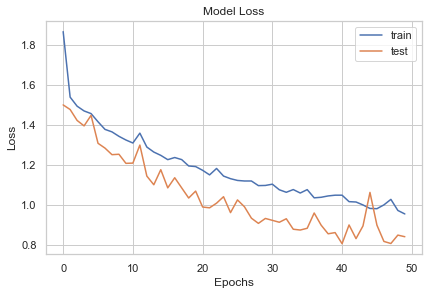

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

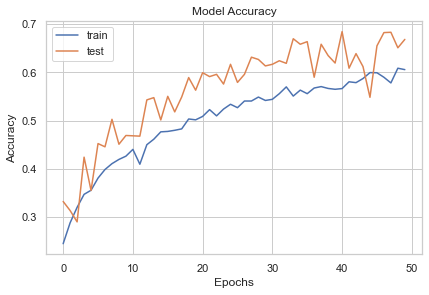

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

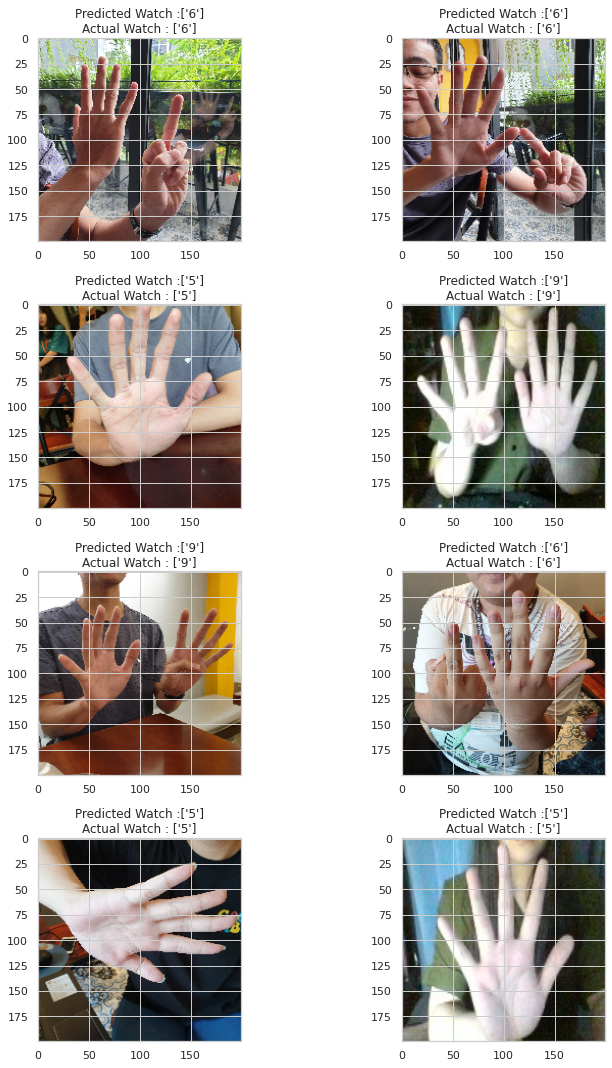

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Watch : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

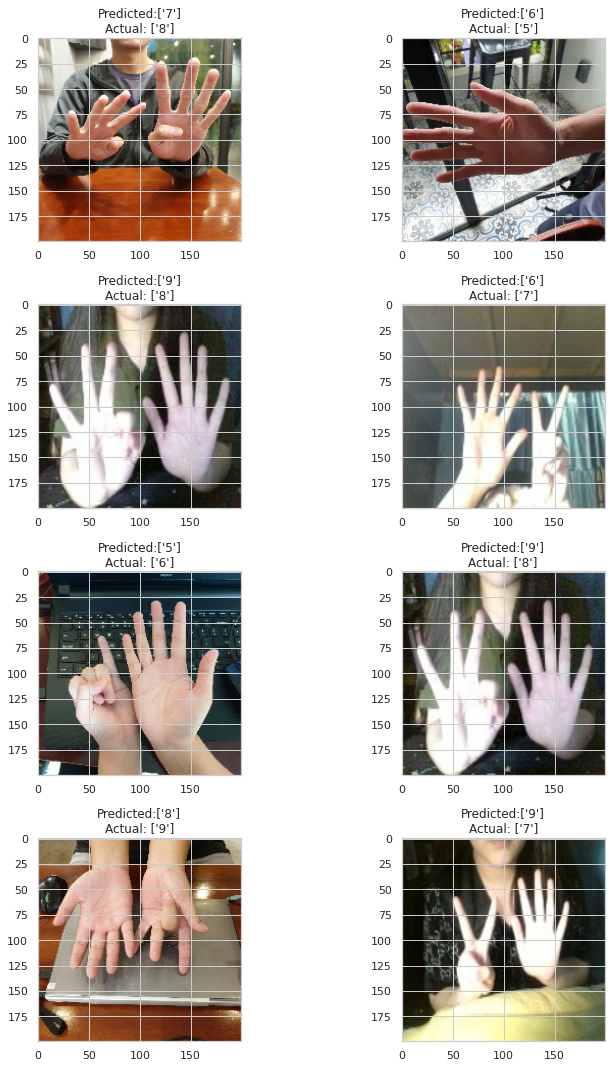

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted:"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual: "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1